### Libraries import

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Examining the Data and Pre-processing

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.shape

(4600, 18)

The dataset has 4600 rows and 18 columns.

In [5]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [6]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


#### Missing Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

No missing values found.

#### Duplicate Values

In [9]:
df[df.duplicated()]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


No duplicate values found.

#### Dropping Unnecessary Columns

We will be dropping all date related columns and also the columns containing information about street, city, and statezip.

In [10]:
df.drop(['date', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip'], axis = 1, inplace = True)

In [11]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'country'],
      dtype='object')

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,USA


In [13]:
df['country'].value_counts()

country
USA    4600
Name: count, dtype: int64

Since the dataset contains observations for "USA" country only, we will also drop the country column as it does not provide any meaningful information.

In [14]:
df.drop(['country'], axis = 1, inplace = True)

In [15]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement'],
      dtype='object')

In [16]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800


### Statistical Analysis

In [17]:
df.describe(include = 'all')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000


In [18]:
def majority_moments(dataset):
    """A function that calculates the majority moments (mean, median, standard deviation, skewness, kurtosis) of numerical columns in the dataset."""
    # filter only numerical columns
    numerical_cols = dataset.select_dtypes(include=['number'])
    moments_dict = {
        'Mean': numerical_cols.mean(),
        'Median': numerical_cols.median(),
        'Standard Deviation': numerical_cols.std(),
        'Skewness': numerical_cols.skew(),
        'Kurtosis': numerical_cols.kurtosis()
    }
    
    moments_df = pd.DataFrame(moments_dict)
    moments_df.index.name = 'Column'
    
    return moments_df

moments_table = majority_moments(df)
print("Majority Moments:")
display(moments_table)

Majority Moments:


,Mean,Median,Standard Deviation,Skewness,Kurtosis
Column,,,,,
price,551962.988473,460943.461539,563834.702547,24.790933,1044.352151
bedrooms,3.400870,3.000000,0.908848,0.456447,1.235377
bathrooms,2.160815,2.250000,0.783781,0.616033,1.865905
sqft_living,2139.346957,1980.000000,963.206916,1.723513,8.291683
sqft_lot,14852.516087,7683.000000,35884.436145,11.307139,219.872987
floors,1.512065,1.500000,0.538288,0.551441,-0.538852
waterfront,0.007174,0.000000,0.084404,11.682901,134.548673
view,0.240652,0.000000,0.778405,3.341586,10.464178
condition,3.451739,3.000000,0.677230,0.959068,0.197730


**Skewness:** Skewness refers to the asymmetry of a dataset's distribution of values. 
* A skewness score of 0 implies that the distribution is fully symmetrical, with equal mean, median, and mode.
* If skewness exceeds 0, the distribution is positively skewed, with a larger tail on the right side (right-skewed).
* If the skewness is less than zero, the distribution is negatively skewed, which means it has a larger tail on the left side.

**Kurtosis:** Kurtosis is a measure of distribution shape, indicating whether it is peaked or flat as compared to a normal distribution. 
* A kurtosis score of 0 means that the distribution has the same peak as a normal distribution (mesokurtic).
* If kurtosis is higher than 0, it means that the distribution is more peaked than a normal distribution (leptokurtic).
* If it is less than 0, it means that the distribituon is less peaked than a normal distribution (platykurtic).

Let's interpret these measures for the **price**, **bedrooms**, and **sqft_lot** columns.

**price**:
* Skewness: 24.790933
* Kurtosis: 1044.352151
* The variable's significant positive skewness and kurtosis indicate that it has a substantially right-skewed distribution with a lengthy tail, pointing to probable outliers and extremes.

**bedrooms**: 
* Skewness: 0.456447
* Kurtosis: 1.235377
* Bedrooms' distribution show minimal skewness and kurtosis, indicating a fairly balanced distribution.

**sqft_lot**:
* Skewness: 11.307139
* Kurtosis: 219.872987
* It has a strong positive skewness and kurtosis, showing a distribution significantly weighted toward smaller values with a large right tail, which might indicate the existence of outliers or extreme values in the dataset.


Since "price" column shows great skewness, we will handle that skewness by applying log transformation to it.

In [19]:
def log_transform_price_column(dataset):
    """A function that applies log transformation to the price column to handle its skewness."""
    # apply log transformation to the "price" column
    dataset['price'] = np.log1p(dataset['price'])
    
    return dataset

df_unskewed = log_transform_price_column(df.copy())
majority_moments(df_unskewed)

,Mean,Median,Standard Deviation,Skewness,Kurtosis
Column,,,,,
price,12.925795,13.041033,1.445945,-7.556013,65.239747
bedrooms,3.400870,3.000000,0.908848,0.456447,1.235377
bathrooms,2.160815,2.250000,0.783781,0.616033,1.865905
sqft_living,2139.346957,1980.000000,963.206916,1.723513,8.291683
sqft_lot,14852.516087,7683.000000,35884.436145,11.307139,219.872987
floors,1.512065,1.500000,0.538288,0.551441,-0.538852
waterfront,0.007174,0.000000,0.084404,11.682901,134.548673
view,0.240652,0.000000,0.778405,3.341586,10.464178
condition,3.451739,3.000000,0.677230,0.959068,0.197730


### EDA and Data Visualization

#### Distribution of Target Variable

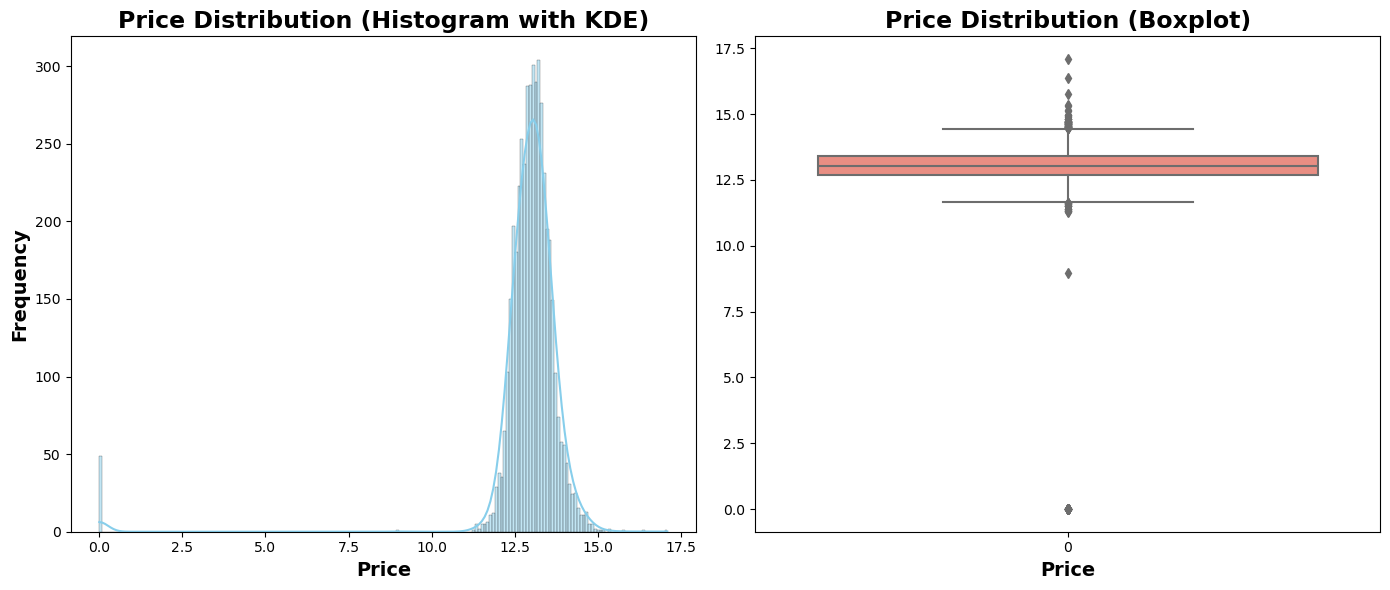

In [20]:
def visualize_price_distribution(dataset):
    plt.figure(figsize=(14, 6))
    
    # subplot 1: Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(dataset['price'], kde=True, color='skyblue')
    plt.title('Price Distribution (Histogram with KDE)', fontsize=17, fontweight='bold')
    plt.xlabel('Price', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')
    
    # subplot 2: Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(dataset['price'], color='salmon')
    plt.title('Price Distribution (Boxplot)', fontsize=17, fontweight='bold')
    plt.xlabel('Price', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig("1.Price_Distribution.png", dpi = 300)
    plt.show()

visualize_price_distribution(df_unskewed)

#### Mean Price by Bedrooms, Floors, View, and Condition

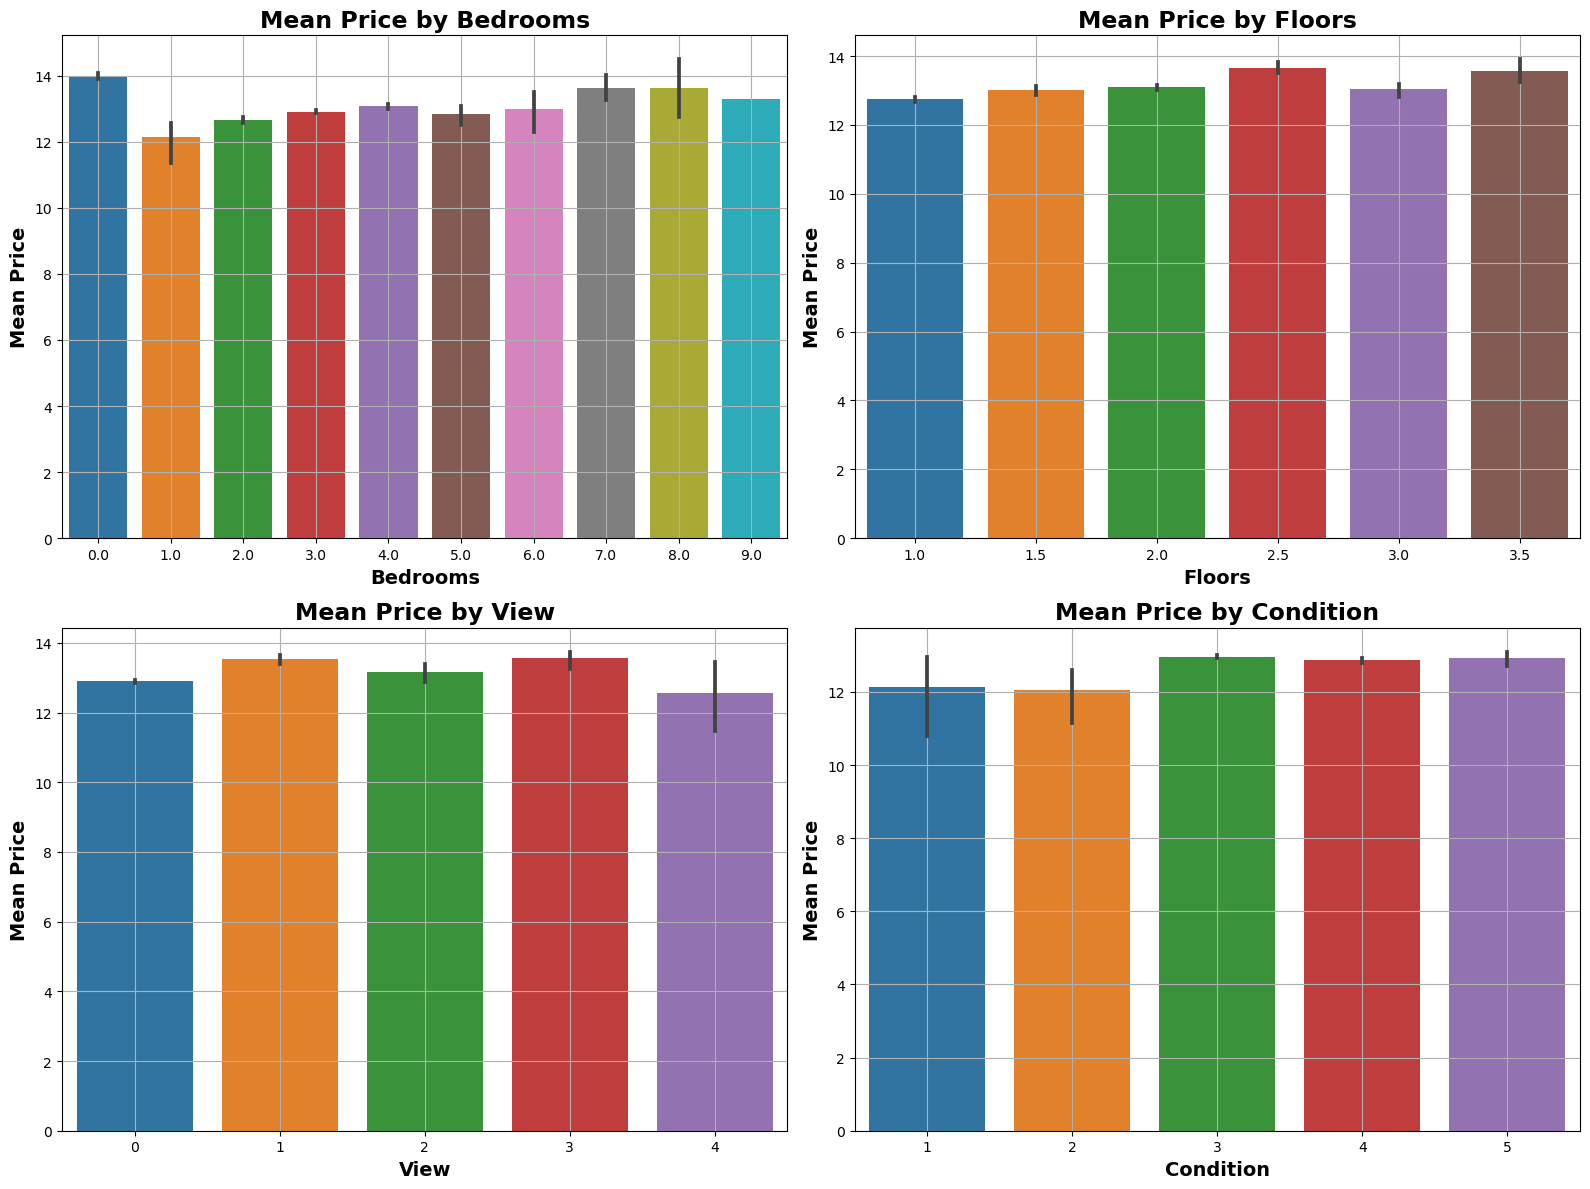

In [21]:
def plot_mean_price_by_categories(dataset):
    """Plots the mean price of houses categorized by bedrooms, floors, view, and condition. """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    categories = ['bedrooms', 'floors', 'view', 'condition']
    
    for i, category in enumerate(categories):
        sns.barplot(x=category, y='price', data=dataset, ax=axes[i//2, i%2])
        axes[i//2, i%2].set_title(f'Mean Price by {category.capitalize()}', fontsize=17, fontweight='bold')
        axes[i//2, i%2].set_ylabel('Mean Price', fontsize=14, fontweight='bold')
        axes[i//2, i%2].set_xlabel(category.capitalize(), fontsize=14, fontweight='bold')
        axes[i//2, i%2].grid(True)
    
    plt.tight_layout()
    plt.savefig('2.Mean_Price_by_Categories.png', dpi = 300)
    plt.show()

plot_mean_price_by_categories(df_unskewed)

#### Correlation Analysis

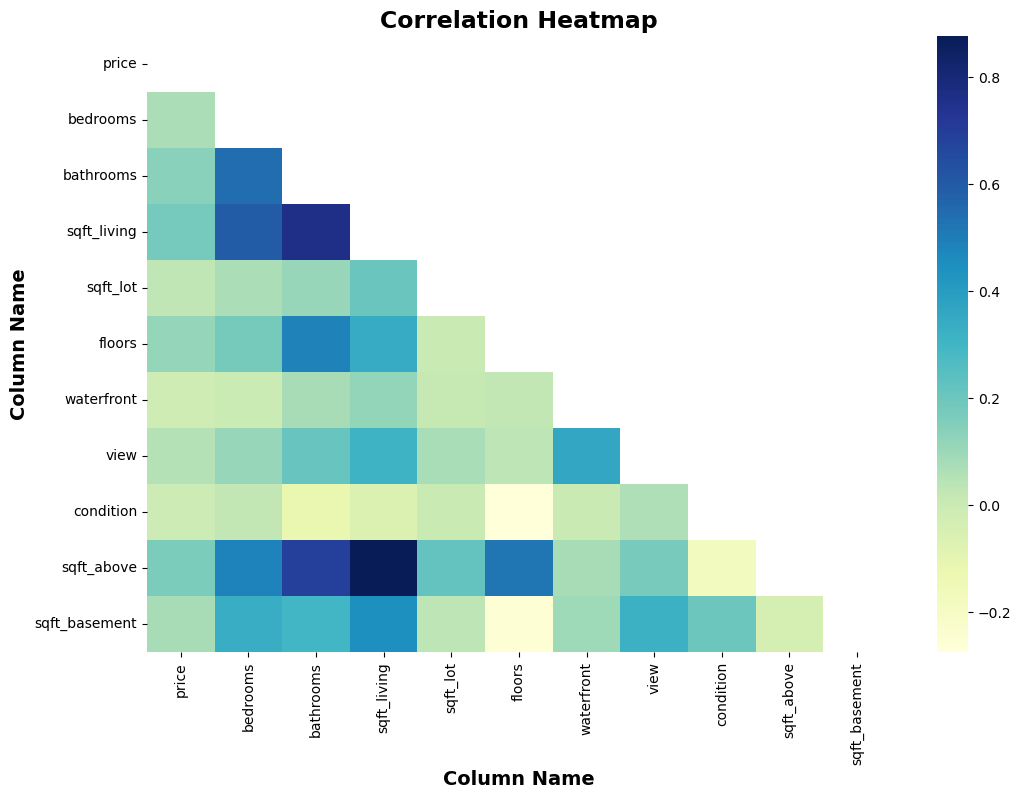

In [22]:
def statistical_heatmap(dataset):
    # extract only numerical columns and find correlation using corr()
    numeric_columns = dataset.select_dtypes(include=['float', 'int']).columns
    corr = dataset[numeric_columns].corr()
    
    # avoid redundancy by getting the lower portion of the heatmap only
    matrix = np.triu(corr)
    
    # build the heatmap
    plt.figure(figsize = (12, 8))
    sns.heatmap(corr, annot=True, fmt=".2%", cmap="YlGnBu", mask=matrix)  # fmt=".2%" to display percentages
    plt.title("Correlation Heatmap", fontsize=17, fontweight='bold')
    plt.xlabel("Column Name", fontsize=14, fontweight='bold')
    plt.ylabel("Column Name", fontsize=14, fontweight='bold')
    plt.savefig('3.Correlation_Heatmap.png', dpi=300)
    plt.show()

statistical_heatmap(df_unskewed)

In [23]:
numeric_columns = df_unskewed.select_dtypes(include=['float', 'int']).columns
corr = df_unskewed[numeric_columns].corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
price,1.000000,0.070052,0.135704,0.182691,0.027662,0.115600,-0.011130,0.049657,-0.009580,0.161910,0.078372
bedrooms,0.070052,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165
bathrooms,0.135704,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020
sqft_living,0.182691,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206
sqft_lot,0.027662,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842
floors,0.115600,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510
waterfront,-0.011130,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501
view,0.049657,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602
condition,-0.009580,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632
sqft_above,0.161910,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723


The **correlation coefficient**, which ranges from -1 to 1, measures the degree and direction of a link between two variables.
* A score of 1 indicates a complete positive correlation, meaning that increasing one variable leads to an increase in the other
*  A value of -1 shows a complete negative correlation, where increasing one variable leads to a decrease in the other
*  A 0 value indicates no correlation between the variables, implying that changes in one do not predict changes in the other.

We can see from the above correlation values that there does not seem to be a good correlation of our target variable **price** with other features in the dataset.

#### Scatter Plots of Columns

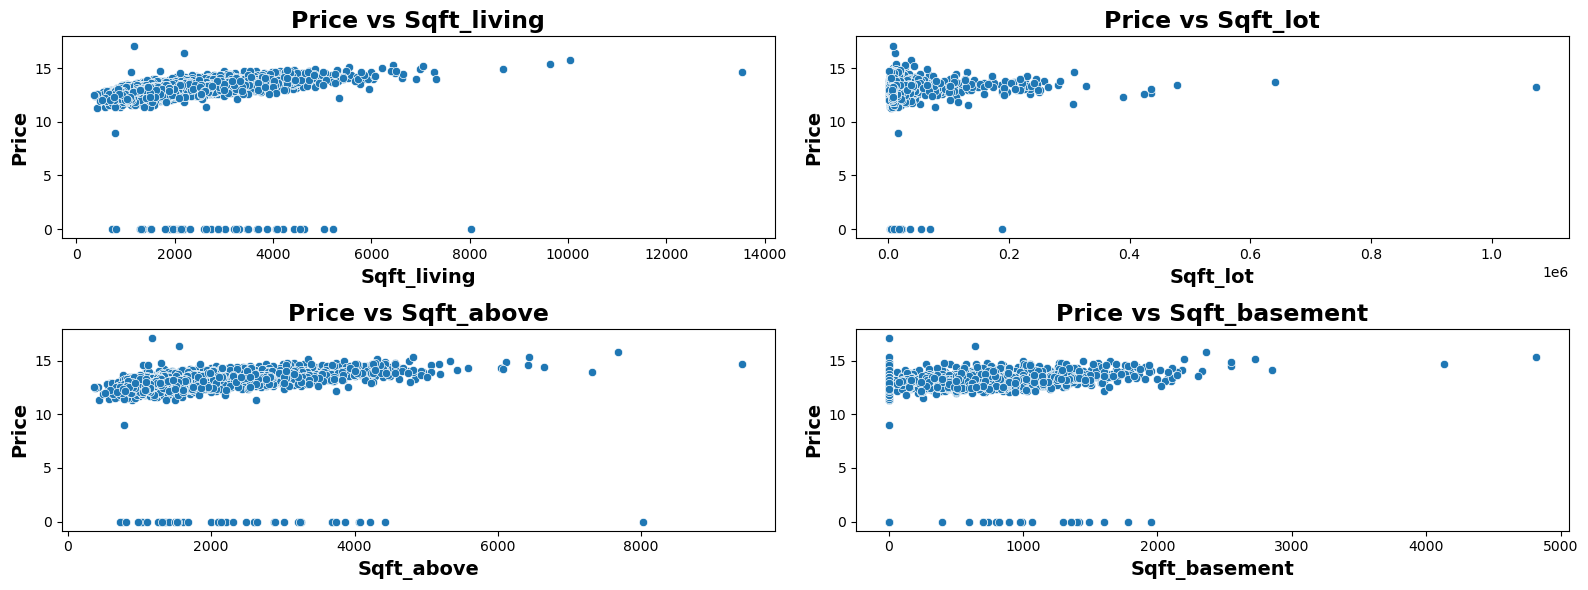

In [24]:
def plot_scatter_price_vs_features(dataset):
    """A function that creates a scatter plot relationship between the price variable and sqft_living, sqft_lot, sqft_above, and sqft_basement."""
    fig, axes = plt.subplots(2, 2, figsize=(16, 6))
    features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
    
    for i, feature in enumerate(features):
        ax = axes[i//2, i%2]
        sns.scatterplot(x = feature, y = 'price', data=dataset, ax=ax)
        ax.set_title(f'Price vs {feature.capitalize()}', fontsize=17, fontweight='bold')
        ax.set_xlabel(feature.capitalize(), fontsize=14, fontweight='bold')
        ax.set_ylabel('Price', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig("4.Scatter_Price_vs_Features.png", dpi = 300)
    plt.show()

plot_scatter_price_vs_features(df_unskewed)

### Model Training and Evaluation

#### Elbow Method - Selecting the Optimal Number of Clusters

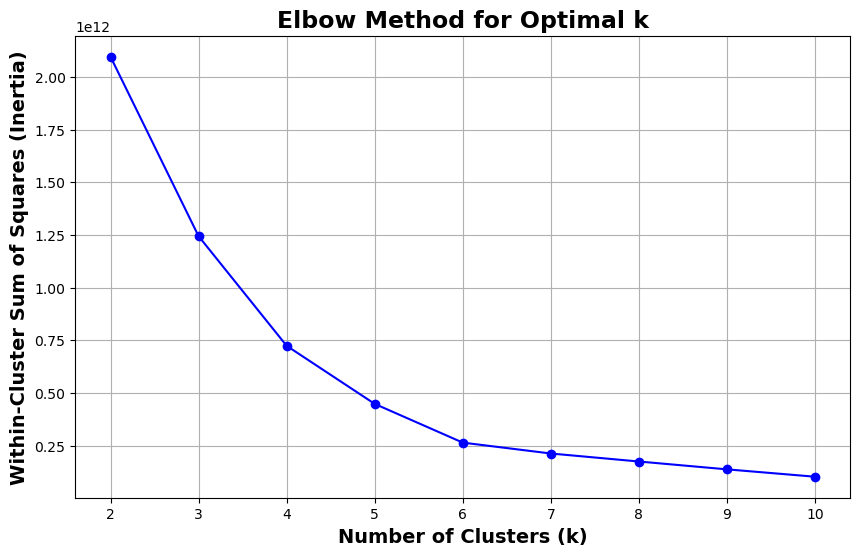

In [25]:
def apply_elbow_method(dataset):
    """A function that applies the elbow method to the provided dataset to find the optimal number of clusters."""
    # initialize lists to store inertia values
    inertia_values = []
    
    # test different values of k (clusters) 
    k_values = range(2, 11)  
    for k in k_values:
        # Create KMeans clustering model
        kmeans = KMeans(n_clusters = k, init='k-means++', n_init=10, max_iter=300, random_state=42)
        kmeans.fit(dataset)
    
        # Append the inertia value to the list
        inertia_values.append(kmeans.inertia_)

    return k_values, inertia_values
    
k_values, inertia_values = apply_elbow_method(df_unskewed)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)', fontsize=14, fontweight='bold')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)', fontsize=14, fontweight='bold')
plt.title('Elbow Method for Optimal k', fontsize=17, fontweight='bold')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('5.Elbow_Method_Optimal_Clusters.png', dpi=300)
plt.show()

The optimal number of clusters in this case seems to be 2, before after 2, there seem to be small drops and not big ones.

#### K-Means Model Creation

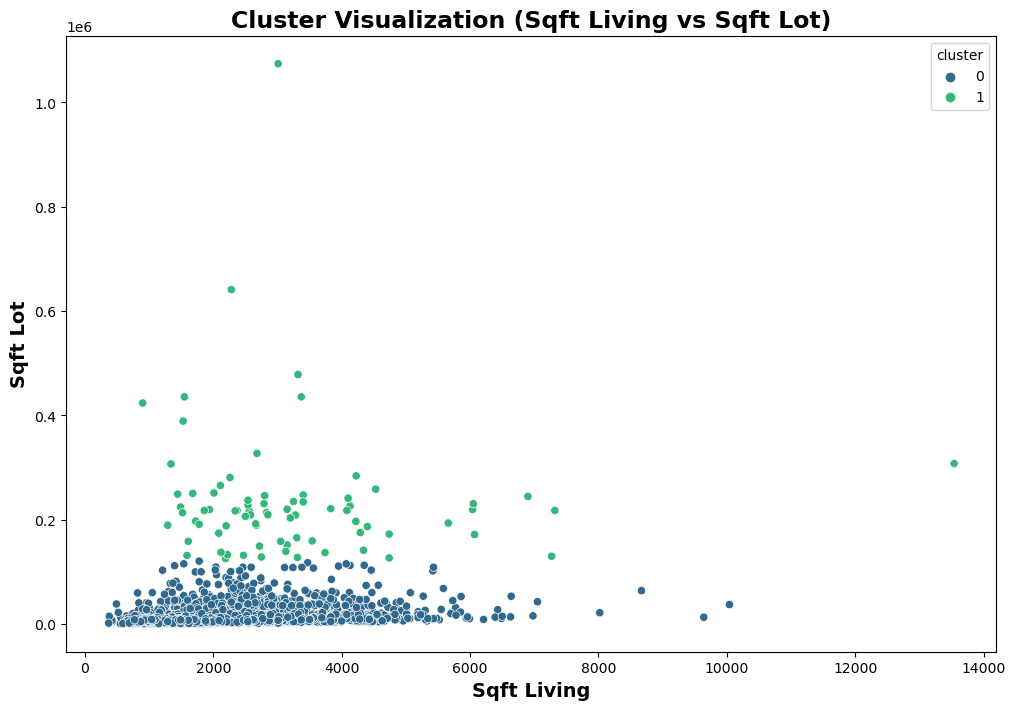

In [26]:
def kmeans_model(dataset):
    """A function that applies K-Means clustering on the provided dataset and number of clusters and also returns the trained model."""
    # instantiate the KMeans model
    kmeans_model = KMeans(n_clusters = 2)
    
    # fit the model to the scaled data
    kmeans_model.fit(dataset)

    return kmeans_model

kmeans_model = kmeans_model(df_unskewed)

# add a cluster column in the reduced data
df_unskewed['cluster'] = kmeans_model.labels_

# Plot the clusters made by the K-Means model
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'sqft_living', y = 'sqft_lot', hue = 'cluster', data = df_unskewed, palette='viridis')
plt.title('Cluster Visualization (Sqft Living vs Sqft Lot)', fontsize = 17, fontweight = 'bold')
plt.xlabel('Sqft Living', fontsize=14, fontweight='bold')
plt.ylabel('Sqft Lot', fontsize=14, fontweight='bold')
plt.savefig("6.Cluster_Visualization_1.png", dpi = 300)
plt.show()

In [27]:
df_unskewed.iloc[1]

price              14.684291
bedrooms            5.000000
bathrooms           2.500000
sqft_living      3650.000000
sqft_lot         9050.000000
floors              2.000000
waterfront          0.000000
view                4.000000
condition           5.000000
sqft_above       3370.000000
sqft_basement     280.000000
cluster             0.000000
Name: 1, dtype: float64

In [28]:
df_unskewed.iloc[2000]

price              12.837347
bedrooms            4.000000
bathrooms           2.750000
sqft_living      2420.000000
sqft_lot         5773.000000
floors              2.000000
waterfront          0.000000
view                0.000000
condition           3.000000
sqft_above       2420.000000
sqft_basement       0.000000
cluster             0.000000
Name: 2000, dtype: float64

In [29]:
# example new data point(s) for prediction
new_data_points = pd.DataFrame({'price': [15, 13], 'bedrooms': [5, 1], 'bathrooms': [0, 3], 'sqft_living': [3600, 2400], 
                                'sqft_lot': [5600, 2100], 'floors': [3, 1], 'waterfront': [0, 1], 'view': [4, 5], 
                                'condition': [4, 5], 'sqft_above': [3300, 2400], 'sqft_basement': [0, 0]})

# use the trained K-means model to predict cluster labels for the new data points
predicted_clusters = kmeans_model.predict(new_data_points)
for i, cluster_label in enumerate(predicted_clusters):
    print(f"Predicted Cluster for New Data Point {i + 1}: {cluster_label}")

Predicted Cluster for New Data Point 1: 0
Predicted Cluster for New Data Point 2: 0


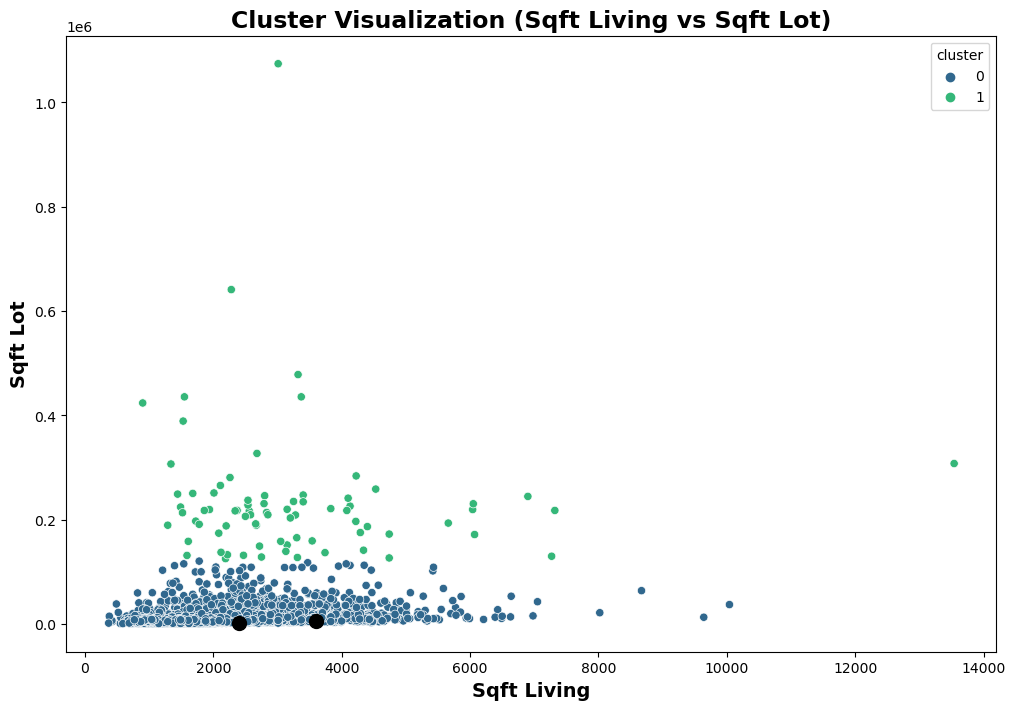

In [30]:
# plot the clusters made by the K-Means model
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'sqft_living', y = 'sqft_lot', hue = 'cluster', data = df_unskewed, palette='viridis')

# plot the new predicted data points
plt.scatter(new_data_points['sqft_living'], new_data_points['sqft_lot'], marker='o', s=100, c='black', label = 'New Predicted Data Points')

plt.title('Cluster Visualization (Sqft Living vs Sqft Lot)', fontsize = 17, fontweight = 'bold')
plt.xlabel('Sqft Living', fontsize=14, fontweight='bold')
plt.ylabel('Sqft Lot', fontsize=14, fontweight='bold')
plt.savefig("7.Cluster_Visualization_2.png", dpi = 300)
plt.show()

#### Fitting Predictions

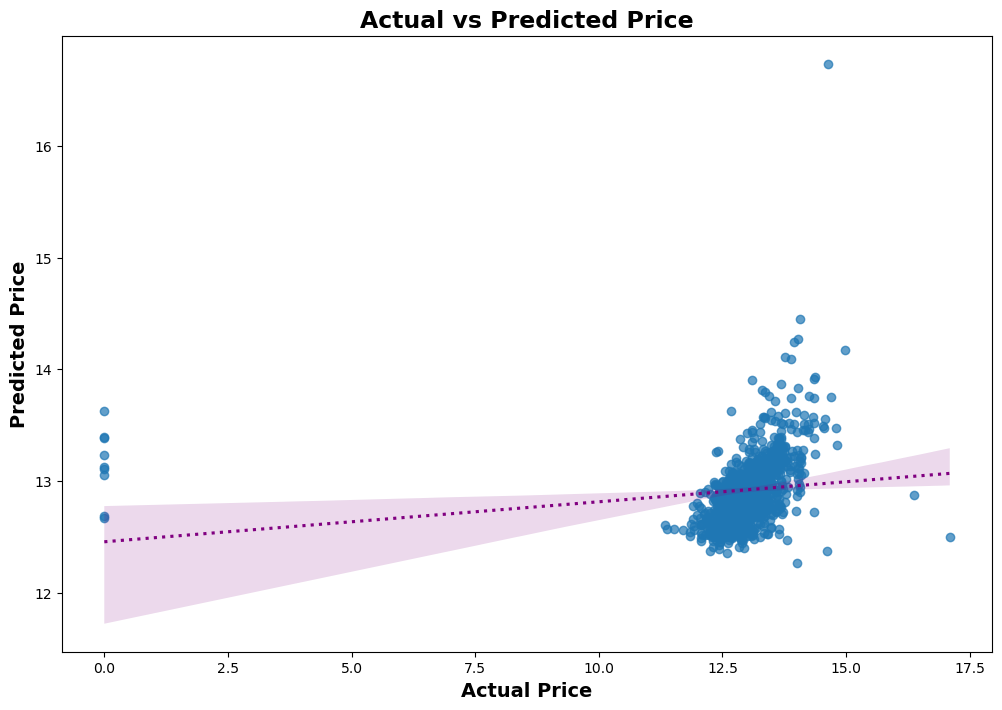

In [36]:
def fitting_predictions(X_train, y_train, X_test):    
    """A function that takes in the training and test data, trains a linear regression model and returns the predictions and the trained model."""
    # initialize Linear Regression model
    LR_model = LinearRegression()
    
    # fit the model on the training data
    LR_model.fit(X_train, y_train)

    # predict on the test data
    y_pred = LR_model.predict(X_test)

    return LR_model, y_pred

# separate features (X) and target variable (y)
X = df_unskewed.drop('price', axis=1)
y = df_unskewed['price']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR_model, y_pred = fitting_predictions(X_train, y_train, X_test)

# plot the predicted vs actual values with confidence intervals
plt.figure(figsize=(12, 8))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"alpha":0.7}, line_kws={"color":"purple", "linestyle":"dotted"}, ci=95)
plt.title('Actual vs Predicted Price', fontsize=17, fontweight='bold')
plt.xlabel('Actual Price', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=14, fontweight='bold')
plt.savefig('8.Linear_Regression_on_Price.png', dpi=300)
plt.show()

#### Linear Regression Evaluation

In [37]:
def evaluate_fitting_predictions(LR_model, y_test, y_pred):
    """A function that takes in the trained model, the test data, and the predictions, and prints relevant metrics such as the model's coefficients,
       model's intercept, the R-square score, the mean absolute error, and the mean squared error."""
    # calculate the model's coefficients and intercept
    coefficients = LR_model.coef_
    intercept = LR_model.intercept_
    print(f'Coefficients {coefficients}')
    print(f'Intercept: {intercept}')
    
    # calculate r-squared score (accuracy)
    r2 = r2_score(y_test, y_pred)
    print(f'R2: {r2}')
    
    # calculate root mean squared error
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    print(f'RMSE: {rmse}')
    
    # calculate mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE {mae}')

evaluate_fitting_predictions(LR_model, y_test, y_pred)

Coefficients [-1.11019518e-01 -9.58185782e-02  2.90378182e-04  7.52330606e-08
  2.70256811e-01 -4.06751153e-01 -2.63096416e-02  4.14811746e-02
  3.99109017e-05  2.50467280e-04 -1.06795385e-01]
Intercept: 12.192060985491214
R2: 0.01794980986700212
RMSE: 1.3874306346390863
MAE 0.486620482016009
